# Predicting the average session duration of a player via experience level

## Introduction

In the gaming industry, it is crucial to understand player behaviour in order to enhance user experience. In particular, a research group in Computer Science at UBC is collecting data about video game playing. To do so, they are using a Minecraft server - a popular open-world sandbox game that allows players to build, explore, and survive in a block-based virtual world. The broad question of interest is which "kinds" of players, measured by their experience level, are most likely to contribute to a large amount of data, measured by their session duration. This is to ensure that the number of licenses on hand is sufficiently large enough to accommodate all players at the same time with a high probability. 

Specifically, we will address the question: **Can we predict the average session duration of a player through their experience level?**

The data we are working with consists of two different sets: **players.csv** which includes data and characteristics about each player, and **sessions.csv** which includes data about each recorded individual playing session.  

<br>

<font size="3"> Players Dataset: A list of all unique players, including data about each player </font>
- Number of observations: 196
- Number of variables: 7

| Variable Name   | Variable Type   | Data Type   | Data Description   |
|------------|------------|------------|------------|
| `experience`  | Categorical  | Character  | Player's experience level in Minecraft (Beginner, Amateur, Regular, Veteran, Pro)  |
| `subscribe`  | Categorical  | Logical  | Indicates whether the player has subscribed to the gaming-related newsletter or not (TRUE = Yes, FALSE = No)  |
| `hashedEmail`  | Categorical (unique identifier variable)  | Character  | Hashed version of the player's email for anonymization  |
| `played_hours`  | Quantitative  | Double  | Total number of hours played by player  |
| `name`  | Categorical  | Character  | Player's name (first name only) |
| `gender`  | Categorical  | Character  | Player's gender (Male, Female, Non-binary, Two-spirited, Other, Prefer not to say) |
| `Age`  | Quantitative  | Double  | Player's age  |  

<br>

<font size="3"> Sessions Dataset: A list of individual play sessions by each player, including data about the session </font>

- Number of observations: 1535
- Number of variables: 5 

| Variable Name   | Variable Type   | Data Type   | Data Description   |
|------------|------------|------------|------------|
| `hashedEmail`  | Categorical (unique identifier variable) | Character  | Hashed version of the player's email for anonymization   |
| `start_time`  | Quantitative  | Character  | Human-readable start time of a playing session, formatted as day/month/year with a 24 hour clock time stamp  |
| `end_time`  | Quantitative  | Character  | Human-readable end time of a playing session, formatted as day/month/year with a 24 hour clock time stamp  |
| `original_start_time`  | Quantitative  | Double  | Start time of a playing session represented in scientific notation Unix timestamp |
| `original_end_time`  | Quantitative  | Double  | End time of a playing session represented in scientific notation Unix timestamp |  

<br>

We will use `experience` as the explanatory variable and `avg_duration`, a variable we will create, as the response variable. By examining patterns in the data, we can determine whether there is a significant relationship between experience and the average session duration of a player.

## Methods & Results

#### Preliminary exploratory data analysis:
Step 1) Imported libraries and read in the `players.csv` and `sessions.csv` datasets from the Minecraft server study.

Step 2) Cleaned and tidied both datasets by selecting relevant columns and converting timestamps to usable formats.

Step 2a) For `sessions.csv`, we separated the `start_time` and `end_time` columns into individual date and time components, <br>
parsed them into POSIX datetime format, and calculated session duration in minutes by subtracting the start from the end timestamp.

Step 3) Merged the datasets using `hashedEmail` to link player profiles with their individual play sessions.

Step 4) Split the data into training and testing sets (only working with the training set until the final evaluation).

Step 5) Summarized the training set to calculate average session duration for each player.

Step 6) Visualized the relationship between session duration and experience level to explore potential patterns.

#### Performing a Linear Regression Analysis:
The objective of this project was to determine whether a player’s self-reported experience level could predict their average session duration. To evaluate this relationship, we built a linear regression model using only the training data, then generated predictions on unseen test data and assessed the model’s performance visually.

---

Step 1) Created a linear regression model to predict average session duration using experience level as the explanatory variable.

Step 2) Fitted the model using the training data only.

Step 3) Evaluated the model using predictions on the test set (unseen data).

Step 4) Visualized predicted versus actual session durations to assess the model’s effectiveness.

Step 5) Interpreted results and assessed whether experience level is a meaningful predictor of play behavior.

---

We believe utilizing a linear regression model is appropriate as it provides a clear and interpretable way to understand the relationships between player characteristics (such as experience and hours played) and the total data contribution as a continuous outcome. Moreover, linear regression assumes that there is a linear relationship between the predictors and the dependent variable, which makes it useful for quantifying how each player characteristic contributes to the total data contribution. Furthermore, linear regression works well on small datasets whereas k-nn regression can be more sensitive to small sample sizes and noise (especially when the predictor is not numeric).

### Preliminary exploratory data analysis:

#### Importing Libraries

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Importing Players and Sessions Datasets
We utilized read_csv to import both of the datasets from the online directory.

In [2]:
players = read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")
sessions = read_csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Combining Datasets and then Splitting the Data into Training and Testing Sets 
In this step, the session and player datasets are combined and then split into training and testing sets (before any data cleaning and transformation is performed). This approach ensures that no information from the test set is used during the model-building process, thereby helping to prevent data leakage.

In [3]:
set.seed(123)

# Combine both (raw) datasets in order to split into training and testing sets 
combined_raw <- inner_join(players, sessions, by = "hashedEmail")

# Combined (raw) dataset is split before cleaning to prevent leakage
split <- initial_split(combined_raw, prop = 0.75, strata = experience)
train_raw <- training(split)
test_raw <- testing(split)

head(train_raw)
head(test_raw)

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,start_time,end_time,original_start_time,original_end_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,09/09/2024 22:30,09/09/2024 22:37,1.72592e+12,1.72592e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,05/05/2024 22:21,05/05/2024 23:17,1.71495e+12,1.71495e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,05/05/2024 23:40,06/05/2024 00:55,1.71495e+12,1.71496e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,05/07/2024 02:39,05/07/2024 03:24,1.72015e+12,1.72015e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,09/09/2024 22:51,10/09/2024 00:40,1.72592e+12,1.72593e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,08/08/2024 00:03,08/08/2024 00:18,1.72308e+12,1.72308e+12


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,start_time,end_time,original_start_time,original_end_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,08/08/2024 00:21,08/08/2024 01:35,1.72308e+12,1.72308e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,08/08/2024 02:41,08/08/2024 03:25,1.72308e+12,1.72309e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,20/04/2024 20:46,20/04/2024 21:48,1.71365e+12,1.71365e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,11/08/2024 15:40,11/08/2024 15:52,1.72339e+12,1.72339e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,09/09/2024 01:48,09/09/2024 03:47,1.72585e+12,1.72585e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,24/08/2024 23:07,25/08/2024 02:38,1.72454e+12,1.72455e+12


$Figure$ $1$

**Legend**: This table shows the first six rows of the raw training set created by joining the player and session datasets using `hashedEmail`, followed by splitting the combined data into training and testing sets. The table includes variables such as experience level, subscription status, session timestamps, and player demographics. At this stage, no data cleaning or transformation has been applied.


**Interpretation**: Each row represents an individual play session from a player assigned to the training set. Several columns (e.g., `start_time`, `end_time`, `original_start_time`, `origina_end_time`) remain in raw character or numeric format. Additionally, the presence of repeated hashedEmail values indicates that players often have multiple sessions. This raw format allows us to inspect the completeness and structure of the dataset before proceeding with data wrangling.

---

$Figure$ $2$

**Legend**: This table displays the first six rows of the test set produced from the same raw joined dataset. These sessions were assigned to the test set via stratified sampling (by experience level) using `initial_split()`. Like the training set, the table retains all raw variables from the original session and player files.


**Interpretation**: The test set mirrors the structure of the training set, with multiple rows per player and unprocessed timestamp columns. No transformation has been applied yet, thus ensuring the test set remains untouched and unbiased prior to evaluation. Furthermore, this separation is essential for preventing data leakage and thereby having the test data accurately reflect unseen input during model validation.

---

#### Cleaning & Wrangling the Training and Test Data Separately
We independently clean the training and test sets to avoid data leakage. This involves separating `start_time` and `end_time` into individual date & time columns, computing session duration (in minutes), and filtering out invalid entries & irrelevant variables.

In [4]:
# Training Set: 
# 1) Separate start_time and end_time into individual date & time columns 
# 2) Compute session duration in minutes by subtracting start time from end time
# 3) Filter out any rows where session duration is missing or unparseable
# 4) Select only relevant columns (variables) for modeling
train_clean <- train_raw |>
  separate(start_time, into = c("start_date", "start_time"), sep = " ") |>
  separate(end_time, into = c("end_date", "end_time"), sep = " ") |>
  mutate(start_datetime = parse_date_time(paste(start_date, start_time), orders = "dmy HM"),
         end_datetime = parse_date_time(paste(end_date, end_time), orders = "dmy HM"),
         duration_mins = as.numeric(difftime(end_datetime, start_datetime, units = "mins"))) |>
  filter(!is.na(duration_mins)) |>
  select(hashedEmail, experience, played_hours, name, age, duration_mins)

# Testing Set:
test_clean <- test_raw |>
  separate(start_time, into = c("start_date", "start_time"), sep = " ") |>
  separate(end_time, into = c("end_date", "end_time"), sep = " ") |>
  mutate(start_datetime = parse_date_time(paste(start_date, start_time), orders = "dmy HM"),
         end_datetime = parse_date_time(paste(end_date, end_time), orders = "dmy HM"),
         duration_mins = as.numeric(difftime(end_datetime, start_datetime, units = "mins"))) |>
  filter(!is.na(duration_mins)) |>
  select(hashedEmail, experience, played_hours, name, age, duration_mins)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `end_datetime = parse_date_time(paste(end_date, end_time),
  orders = "dmy HM")`.
Caused by warning:
!  2 failed to parse.”


**Note**: A warning appeared indicating that two values failed to parse correctly using `parse_date_time()` in `end_datetime`. This likely occurred due to timestamps being missing or improperly formatted (e.g., invalid dates or times) in `end_date` or `end_time`. These rows were automatically filtered out using `filter(!is.na(duration_mins))`, so they a negligible impact on the overall results. This was done to ensure only valid session durations were included in the analysis.

---

#### Summarizing the Training & Test Data
After cleaning & wrangling the training and test data separately, we summarize each dataset so that each player is represented by a single row (based on their average session duration across all sessions).

In [5]:
# Summarize average session duration per player in training set
train_summary <- train_clean |>
  group_by(hashedEmail, experience, played_hours, name, age) |>
  summarize(avg_duration = mean(duration_mins), .groups = "drop")

# Prepare test set summary (for evaluation later)
test_summary <- test_clean |>
  group_by(hashedEmail, experience, played_hours, name, age) |>
  summarize(avg_duration = mean(duration_mins), .groups = "drop")

head(train_summary)
head(test_summary)

hashedEmail,experience,played_hours,name,age,avg_duration
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,1.5,Isaac,20,61.00000
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,0.4,Lyra,21,30.00000
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,32.83333
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,Pro,1.0,Knox,17,35.00000
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,Veteran,0.1,Callum,19,10.00000
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,17.2,Kyrie,14,31.39286


hashedEmail,experience,played_hours,name,age,avg_duration
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,1.5,Isaac,20,45
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,0.1,Osiris,17,11
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,24
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,Amateur,0.7,Hugo,21,50
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,17.2,Kyrie,14,26
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,Beginner,0.2,Aurora,37,18


$Figure$ $3$

**Legend**: This table shows the first few rows of the summarized training and test sets. Each row represents one unique player and includes their self-reported experience level, total hours played, age, and average session duration in minutes. These values were computed by grouping all valid session entries per player and calculating the mean session duration.


**Interpretation**: The training data reveals variability in average session durations across players (even among those with similar experience levels) For example, the player "Isaac" (Regular) has a much higher average session duration (61 minutes) than "Winslow" (Regular), who averages around 33 minutes. Additionally, players with minimal played hours (e.g., "Callum") tend to have shorter average durations, which suggests possible early disengagement. These differences highlight the diversity of session behaviors within each experience category.

---

$Figure$ $4$

**Legend**: This table shows the first six rows of the testing dataset, which will be used solely for final model evaluation. Like the training set, each row represents a player and includes their experience level, played hours, age, and average session duration, calculated from their sessions that fell into the testing portion of the data split.


**Interpretation**: The test set also shows a wide range of average session durations across players. For example, "Hugo" (Amateur) averaged up to 50 minutes while others like "Osiris" (Beginner) had much shorter sessions (11 minutes). Despite there being some players with the same `hashedEmail` in both the training and test set (due to stratified splitting by session), the session durations are independent (which reflects different play sessions). This diversity underscores the importance of using modeling to determine whether experience level alone can meaningfully predict session behavior.

---

#### Visualizing Average Session Duration by Player Experience
We create a bar chart showing the average session duration for each experience level using the training set only.

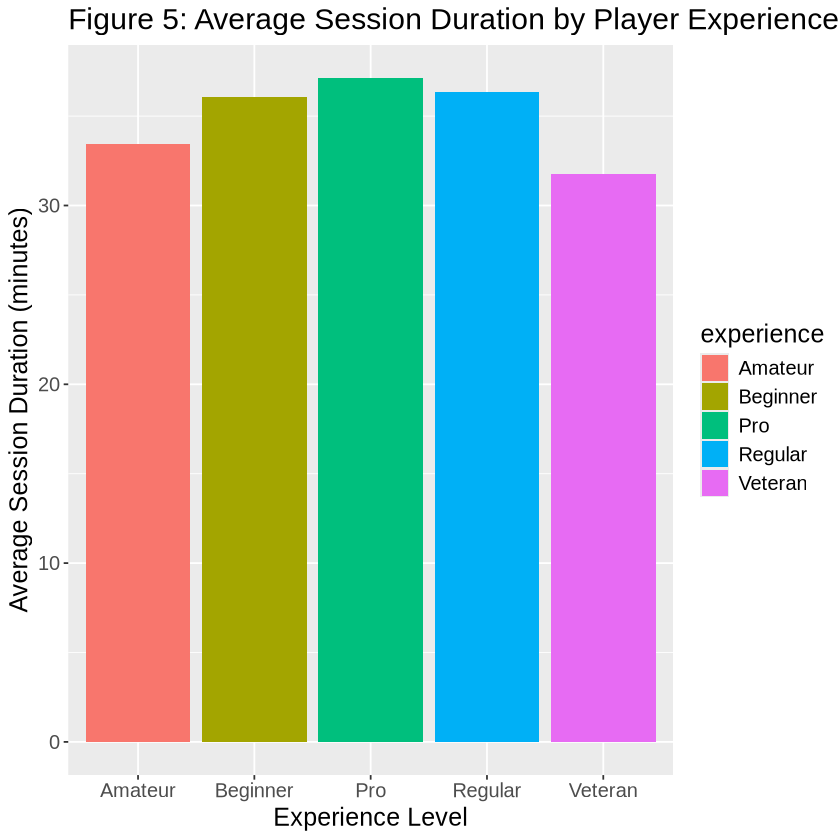

In [6]:
# Summarize average session duration by experience
eda_summary_train <- train_summary |>
  group_by(experience) |>
  summarize(mean_duration = mean(avg_duration), count = n())

# Plot
ggplot(eda_summary_train, aes(x = experience, y = mean_duration, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Figure 5: Average Session Duration by Player Experience (Training Set)",
        x = "Experience Level",
        y = "Average Session Duration (minutes)")+
    theme(text = element_text(size = 15))

$Figure$ $5$

**Legend**: This bar chart displays the mean average session duration for players in each experience group, calculated using only the training data. Each bar represents the average of all players within a given experience level, where individual values were computed as the mean duration across all sessions for each player.

**Interpretation**: The differences between experience groups are relatively modest. Players in the "Pro", "Regular", and "Beginner" categories show slightly higher average session durations, while "Amateur" and "Veteran" players have lower averages. However, the differences are not substantial enough to suggest a strong or consistent trend. These findings indicate that while experience level may be loosely associated with session duration, it is unlikely to serve as a robust or reliable predictor. This is consistent with the later regression results, which found no statistically significant effect.

**Reasoning for Figure Choice**: a bar chart is used in order to provide a clear and immediate visual comparison of average session durations across different player experience levels. Since the variable `experience` is categorical and the outcome average `session duration` is continuous, we believe that a bar chart is an appropriate and effective choice for summarizing group means (i.e., showing the average session duration for each experience level). Moreover, it allows us to quickly observe which experience levels are associated with higher or lower average durations and to identify any visible trends or differences between categories.

---

### Regression Analysis (Linear Regression)
We fit a linear regression model using the training data to predict average session duration from experience level.

In [7]:
# Fit linear regression model
lm_model <- linear_reg() |>
  set_engine("lm") |>
  fit(avg_duration ~ experience, data = train_summary)

summary(lm_model$fit)


Call:
stats::lm(formula = avg_duration ~ experience, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-31.37 -23.31 -13.43  16.24 115.22 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          33.424      5.813   5.750 1.03e-07 ***
experienceBeginner    2.669     10.068   0.265    0.791    
experiencePro         3.701     13.318   0.278    0.782    
experienceRegular     2.945      9.407   0.313    0.755    
experienceVeteran    -1.642      9.274  -0.177    0.860    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.89 on 97 degrees of freedom
Multiple R-squared:  0.003334,	Adjusted R-squared:  -0.03777 
F-statistic: 0.08112 on 4 and 97 DF,  p-value: 0.988


$Figure$ $6$

**Legend**: This output shows the results of a linear regression model trained to predict a player’s average session duration based on their self-reported experience level. The model was fit using the training set only. The intercept represents the average duration for the baseline category ("Amateur"), and the other coefficients reflect differences relative to that group.

**Interpretation**: The model’s R² value is extremely low (0.003334), indicating that experience level explains less than 1% of the variability in session duration. Additionally, none of the experience-level coefficients are statistically significant (all p-values > 0.5), suggesting that differences between groups are not reliable or generalizable. This confirms that experience alone is not a strong or meaningful predictor of how long players engage in sessions. The model may be underfitting the data, or the predictor simply lacks explanatory power for this outcome.

---

#### Visualizing Predicted vs Actual Values on the Test Set
We use the test set to evaluate the model by visually comparing predicted values to actual session durations.

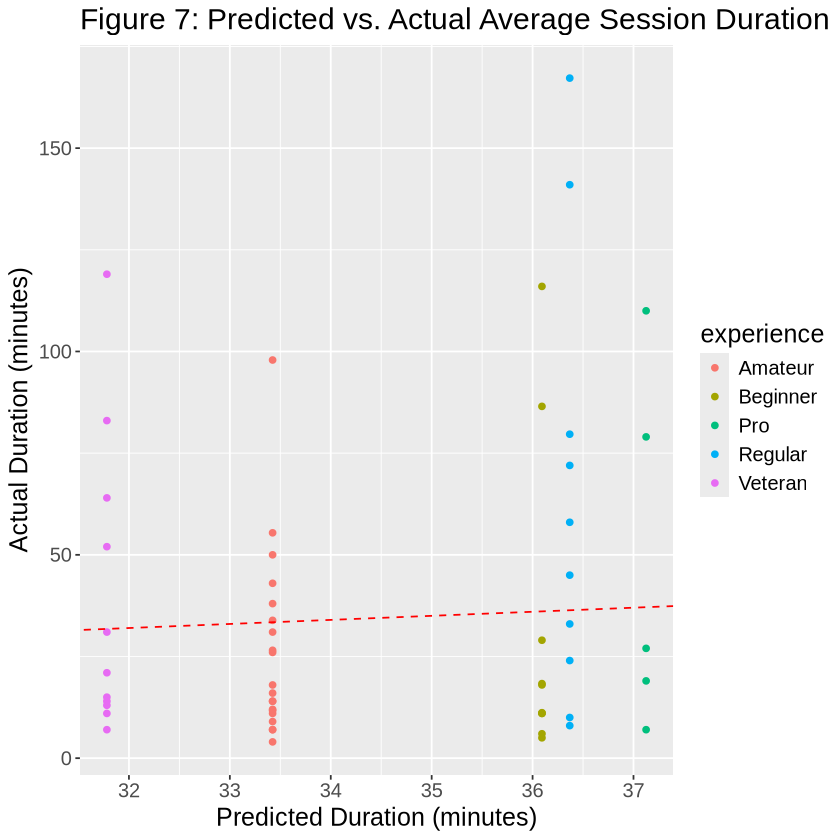

In [8]:
# Predict on test set (unseen data)
test_summary <- test_summary |>
  mutate(pred = predict(lm_model, test_summary)$.pred)

# Plot
ggplot(test_summary, aes(x = pred, y = avg_duration, color = experience)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Figure 7: Predicted vs. Actual Average Session Duration",
        x = "Predicted Duration (minutes)",
        y = "Actual Duration (minutes)") +
    theme(text = element_text(size = 15))

$Figure$ $7$

**Legend**: This scatterplot compares the predicted average session duration (x-axis) to the actual observed average session duration (y-axis) for each player in the test set. Each point represents one player, and colors indicate their self-reported experience level. The red dashed line represents the ideal outcome where predictions perfectly match actual values (i.e., predicted = actual).


**Interpretation**: The points are widely scattered around the red reference line with no consistent alignment. This indicates that the linear model struggled to predict average session duration based on experience level. Moreover, many points fall far above or below the line (especially at higher actual durations), which suggests underestimation and low predictive accuracy. Furthermore, the points do not closely follow the diagonal line, and the predicted values are clustered within a narrow range. What this means is the model predicted similar session durations for most players (even though their actual durations varied widely). This supports the earlier regression results, which showed a very low R² and no statistically significant coefficients, reinforcing the conclusion that experience level alone is not a strong predictor of session behavior. Overall, this visualization reinforces the conclusion that experience level alone does not explain session behavior.

**Reasoning for Model Choice**: We utilized a linear regression model to (hopefully) determine whether a player’s experience level could meaningfully predict their average session duration. To quantify the relationship between a categorical explanatory variable (experience) and a continuous response variable (avg_duration), we chose to use a linear regression model to generate a set of predictions based on the model's best-fitting line. Ideally, if the model had strong predictive power, the points would closely follow the red dashed line representing perfect prediction. However, the widespread scatter and lack of alignment with the line reveal that the model struggles to generalize, thereby indicating poor predictive accuracy. 

---

## Discussion

### Summarizing what we found

This project explored whether a player’s self-reported experience level could be used to predict their average session duration. To begin, we cleaned and summarized session data for each player and visualized the relationship using a bar chart (Figure 6). The plot showed some variability across groups: Pro players had the longest average session durations, followed by Regular and Beginner players. In contrast, Veterans and Amateurs had shorter average durations. While this pattern suggested that experience might influence playtime, the differences were modest and visually inconclusive.

To formally test the relationship, we built a linear regression model using only the training set. The results showed that experience level did not significantly predict average session duration. The model’s R² value was very low (0.003334), and all p-values for experience categories were above 0.05, which indicated no statistical significance. When we applied the model to the test set, it generated very similar predicted values for most players, ultimately showing little variation across experience groups. These predictions failed to reflect the wide range of actual session durations observed in the test set, which further demonstrated the model’s lack of explanatory power. The predicted vs. actual scatterplot (Figure 7) further confirmed this since it showed no clear alignment and reinforcing that the model had poor generalization ability.

In summary, although the exploratory visualization hinted at some group-level differences, the regression results demonstrated that experience level alone is not a reliable predictor of how long players stay in a session.


### Expected findings vs outcome

These findings are not necessarily unexpected as little background information about these data sets was provided. Since we are interested in determining which types of players contribute the most data, we did not previously know which relationships/strengths were present amongst the variables in these datasets. Therefore, we did not have strong expectations for the potential relationship between player experience level and average session duration. While we thought this may or may not be a possible predictor for this data, the main goal of this report was to look further into this relationship and determine if it is or not. Ultimately, we came to the conclusion that experience level is NOT a strong predictor of playing session length. With this information, we can move on to exploring other potential relationships and ways to determine which kinds of players tend to contribute the most data to this research.

### What impact could such findings have?

In gaming development spaces, developers often rely on easily accessible user profile features (e.g.,  age, experience level, or self-reported skill) to anticipate player behavior. For example, one might assume that more experienced players are more engaged resulting in longer sessions, or that new players leave quickly. However, this project shows that those assumptions may not hold up under scrutiny as we found that experience level is NOT a strong predictor of playing session length. Essentially, experience level explained virtually none of the variation in session duration (as evidenced by the low R² value and poor model performance on test data).

This insight could lead game designers and platform developers to reconsider what kinds of data are meaningful when attempting to understand or predict player engagement. Instead of relying on labels like “Pro” or “Beginner,” it may be more effective to focus on dynamic behavioral data (e.g., frequency of logins, time-of-day patterns, or in-game actions taken). These types of features could potentially offer more predictive power and support more personalized interventions like targeted feedback or adaptive difficulty levels.

Moreover, this project also shows why it's important to test ideas with data instead of relying on assumptions. Just because a variable like experience level seems like it should be useful doesn’t mean it actually helps predict behavior. If researchers or developers don’t test their assumptions, they would spend time and resources on strategies that potentially don’t work.

### What future questions could this lead to?

This finding opens the door to several follow-up research questions:

1. Are there other variables in the dataset that have better predictive power toward session duration than experience level?

2. Are there interactions between variables? Perhaps experience level only matters when combined with other factors (e.g., time of day or subscription status).

3. Would machine learning perform better? Future work could test whether more complex models (like decision trees or neural networks) outperform linear regression in predicting session duration.

# Group 002-30: Janine Jiao, Sadie Graham, Stephen Zhou, Charles Kim